# Regression

**Lecture:** Articifial Intelligence 1, THI<br>
**Data:** Boston Housing data

In [4]:
## load Packages
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

In [5]:
## Load Data
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston["MEDV"] = boston_dataset.target
boston.head()

C:\Users\Ina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

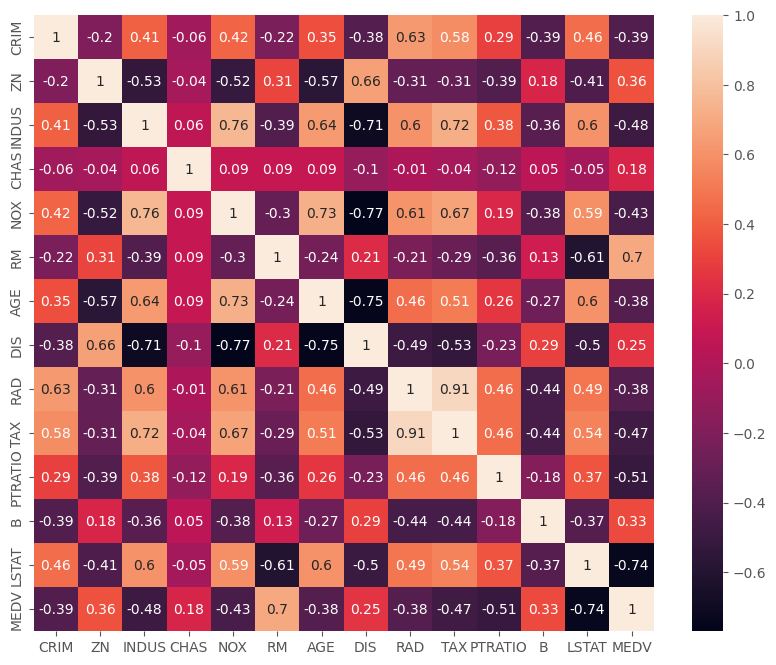

In [6]:
# Correlation Matrix
correlation_matrix = boston.corr().round(2)
print(correlation_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

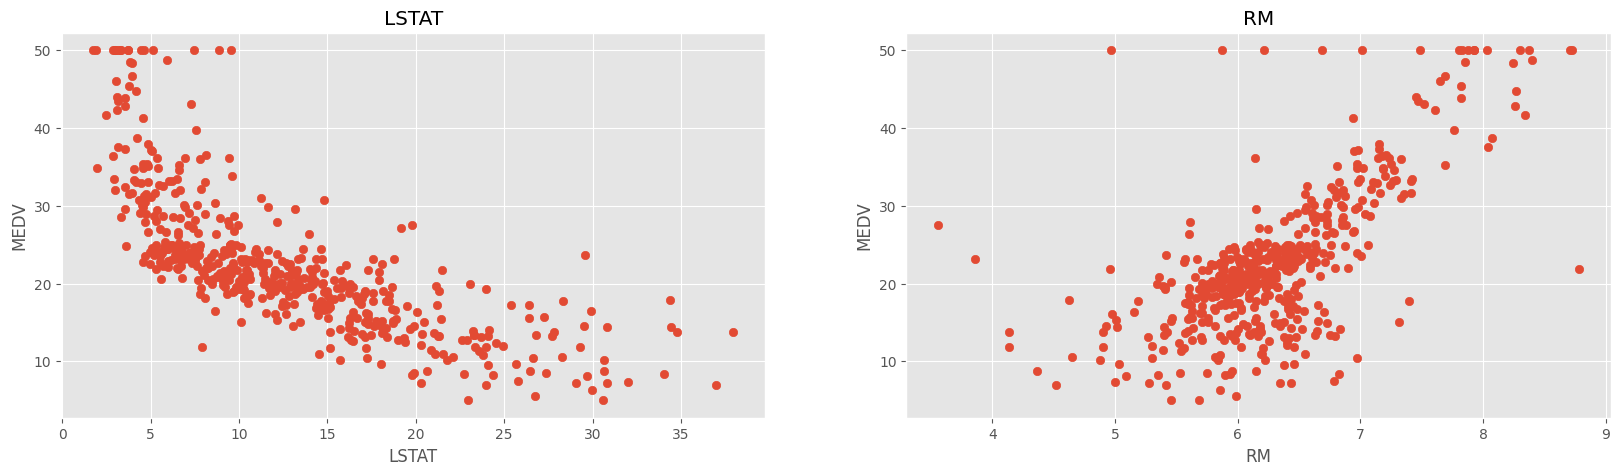

In [7]:
## Plots
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [8]:
## Model fitting
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

lin_model = LinearRegression()
lin_model.fit(X, Y)

LinearRegression()

In [9]:
lin_model.score(X,Y)

0.6385616062603403

In [10]:
## Calculate the RMSE
from sklearn.metrics import mean_squared_error
y_pred = lin_model.predict(X)
print("RMSE training data:", np.sqrt(mean_squared_error(Y, y_pred)))

RMSE training data: 5.523809263298243


TypeError: regplot() takes from 0 to 1 positional arguments but 3 positional arguments (and 2 keyword-only arguments) were given

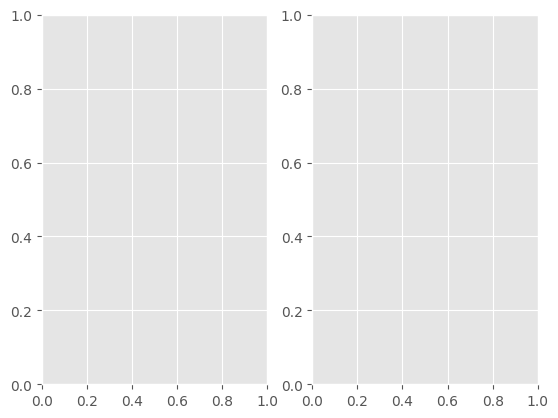

In [11]:
## Plot regression
import seaborn as sns
fig, ax = plt.subplots(1, 2)
sns.regplot('RM', 'MEDV', boston, ax=ax[0], scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT', 'MEDV', boston, ax=ax[1], scatter_kws={'alpha': 0.4})

c:\users\schoen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

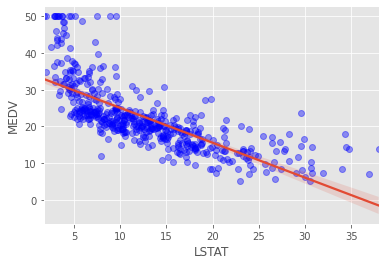

In [14]:
## Plot regression
fig, ax = plt.subplots()
sns.regplot('LSTAT', 'MEDV', boston, scatter_kws={'alpha': 0.4, 'color' : "b"})

## Polynomial Regression

In [13]:
## Load Packages
from sklearn.preprocessing import PolynomialFeatures

In [14]:
## Create Features of degrees
poly = PolynomialFeatures(degree=3) 
x_poly = poly.fit_transform(X['LSTAT'].values.reshape(-1,1)) 

In [15]:
x_poly

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827],
       ...,
       [  1.      ,   5.64    ,  31.8096  , 179.406144],
       [  1.      ,   6.48    ,  41.9904  , 272.097792],
       [  1.      ,   7.88    ,  62.0944  , 489.303872]])

In [17]:
## Model fitting
clf = LinearRegression()
clf.fit(x_poly, Y) 

LinearRegression()

Text(0, 0.5, 'MEDV')

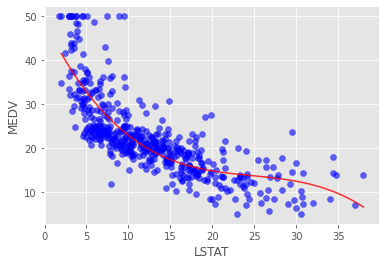

In [18]:
## Plot Regression line
fig, ax = plt.subplots()
 # Plot the samples
ax.scatter(X['LSTAT'], Y, alpha=0.6, c="blue")

# Plot the polynomial model
x_ = np.linspace(2, 38, 50).reshape(-1, 1)
x_poly2 = poly.fit_transform(x_)
x_poly2.shape

y_ = clf.predict(x_poly2)

ax.plot(x_, y_, color='red', alpha=0.8)
ax.set_xlabel('LSTAT'); ax.set_ylabel('MEDV')

In [19]:
# import packages
import statsmodels.api as sm

## Loess

In [ ]:
# simulated data
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))
plt.scatter(x,y, c='b')
plt.show()

In [ ]:
# fit loess function
lowess = sm.nonparametric.lowess
w = lowess(y, x, frac=1./5)

In [ ]:
# plot loess function
fig, ax = plt.subplots()
 # Plot the samples
ax.scatter(x, y, alpha=0.6, c="blue")
ax.plot(w[:,0], w[:,1], color='red', alpha=0.8)
ax.set_xlabel('x'); ax.set_ylabel('sin(x)')